<a href="https://colab.research.google.com/github/dkbean/Improved-stability-of-WGAN-GP/blob/main/5.%20WGAN-GP%20Anime(implement%20learning%20rate%20schedule%20%2B%20enhanced%20network%20architecture).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!mkdir generator

In [ ]:
#Create folders to save 3000 generated images for each n epochs
import os
import subprocess

n=10
# Specify the base folder where you want to create the subfolders
base_folder = ""  # Replace with your desired base folder path


# Create 15 folders with the specified naming pattern
for x in range(0, 801, n):
    folder_name = f'animeGenerated_wgan_{x}epochs'
    folder_path = os.path.join(base_folder, folder_name)

    try:
        os.makedirs(folder_path)
        print(f"Created folder: {folder_path}")
    except FileExistsError:
        print(f"Folder already exists: {folder_path}")

print("Folders created successfully.")

Created folder: animeGenerated_wgan_0epochs
Created folder: animeGenerated_wgan_10epochs
Created folder: animeGenerated_wgan_20epochs
Created folder: animeGenerated_wgan_30epochs
Created folder: animeGenerated_wgan_40epochs
Created folder: animeGenerated_wgan_50epochs
Created folder: animeGenerated_wgan_60epochs
Created folder: animeGenerated_wgan_70epochs
Created folder: animeGenerated_wgan_80epochs
Created folder: animeGenerated_wgan_90epochs
Created folder: animeGenerated_wgan_100epochs
Created folder: animeGenerated_wgan_110epochs
Created folder: animeGenerated_wgan_120epochs
Created folder: animeGenerated_wgan_130epochs
Created folder: animeGenerated_wgan_140epochs
Created folder: animeGenerated_wgan_150epochs
Created folder: animeGenerated_wgan_160epochs
Created folder: animeGenerated_wgan_170epochs
Created folder: animeGenerated_wgan_180epochs
Created folder: animeGenerated_wgan_190epochs
Created folder: animeGenerated_wgan_200epochs
Created folder: animeGenerated_wgan_210epochs

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install pytorch-fid

In [ ]:
# !pip uninstall tensorflow -y
#

In [ ]:
# !pip install  tensorflow==2.14.0

In [ ]:
!unzip /content/drive/MyDrive/anime_test.zip -d ./

Archive:  /content/drive/MyDrive/anime_test.zip
   creating: ./anime_test/
  inflating: ./anime_test/anime_3001.jpg  
  inflating: ./anime_test/anime_3002.jpg  
  inflating: ./anime_test/anime_3003.jpg  
  inflating: ./anime_test/anime_3004.jpg  
  inflating: ./anime_test/anime_3005.jpg  
  inflating: ./anime_test/anime_3006.jpg  
  inflating: ./anime_test/anime_3007.jpg  
  inflating: ./anime_test/anime_3008.jpg  
  inflating: ./anime_test/anime_3009.jpg  
  inflating: ./anime_test/anime_3010.jpg  
  inflating: ./anime_test/anime_3011.jpg  
  inflating: ./anime_test/anime_3012.jpg  
  inflating: ./anime_test/anime_3013.jpg  
  inflating: ./anime_test/anime_3014.jpg  
  inflating: ./anime_test/anime_3015.jpg  
  inflating: ./anime_test/anime_3016.jpg  
  inflating: ./anime_test/anime_3017.jpg  
  inflating: ./anime_test/anime_3018.jpg  
  inflating: ./anime_test/anime_3019.jpg  
  inflating: ./anime_test/anime_3020.jpg  
  inflating: ./anime_test/anime_3021.jpg  
  inflating: ./anime_t

In [ ]:
!unzip /content/drive/MyDrive/anime_train.zip -d ./

Streaming output truncated to the last 5000 lines.
  inflating: ./anime_train/anime_60006.jpg  
  inflating: ./anime_train/anime_60007.jpg  
  inflating: ./anime_train/anime_60008.jpg  
  inflating: ./anime_train/anime_60009.jpg  
  inflating: ./anime_train/anime_6001.jpg  
  inflating: ./anime_train/anime_60010.jpg  
  inflating: ./anime_train/anime_60011.jpg  
  inflating: ./anime_train/anime_60012.jpg  
  inflating: ./anime_train/anime_60013.jpg  
  inflating: ./anime_train/anime_60014.jpg  
  inflating: ./anime_train/anime_60015.jpg  
  inflating: ./anime_train/anime_60016.jpg  
  inflating: ./anime_train/anime_60017.jpg  
  inflating: ./anime_train/anime_60018.jpg  
  inflating: ./anime_train/anime_60019.jpg  
  inflating: ./anime_train/anime_6002.jpg  
  inflating: ./anime_train/anime_60020.jpg  
  inflating: ./anime_train/anime_60021.jpg  
  inflating: ./anime_train/anime_60022.jpg  
  inflating: ./anime_train/anime_60023.jpg  
  inflating: ./anime_train/anime_60024.jpg  
  infl

In [ ]:
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

from matplotlib import pyplot as plt
import numpy as np

import os

In [ ]:
! pwd


/content


In [ ]:
print(tf.version.VERSION)

2.15.0


In [ ]:
anime_data_dir = "/content/anime_train"

In [ ]:
FID_scores = []
def lastWord(string): # get the FID score from the FID command's result

    # split by space and converting
    # string to list and
    lis = list(string.split(" "))

    # length of list
    length = len(lis)

    # returning last element in list
    return lis[length-1]

In [ ]:
train_images = tf.keras.utils.image_dataset_from_directory(
    anime_data_dir, label_mode=None, image_size=(64, 64), batch_size=256 # Margaret: increase batch size from 32
)

Found 60565 files belonging to 1 classes.


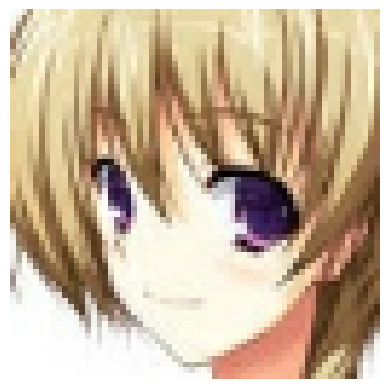

In [ ]:
image_batch = next(iter(train_images))
random_index = np.random.choice(image_batch.shape[0])
random_image = image_batch[random_index].numpy().astype("int32")

# Visualize 1 random image from the training dataset
plt.axis("off")
plt.imshow(random_image)
plt.show()

In [ ]:
def show(images):
    plt.figure(figsize=(4, 4))

    for i in range(16):
        plt.subplot(4, 4, i+1)
        img = keras.utils.array_to_img(images[i])
        plt.imshow(img)
        plt.axis('off')
    plt.show()

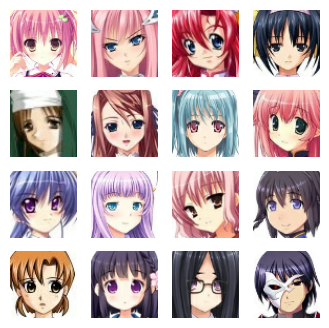

In [ ]:
# Visualize 16 images from the training dataset
show(image_batch[:16])

In [ ]:
# Normalize the images to [-1, 1] which is the range of the tanh activation
train_images = train_images.map(lambda x: (x - 127.5) / 127.5)

In [ ]:
# latent dimension of the random noise
LATENT_DIM = 128

# number of channels, 1 for gray scale and 3 for color images
CHANNELS = 3

In [ ]:
def build_generator():
    epsilon = 0.00001 # Small float added to variance to avoid dividing by zero in the BatchNorm layers.
    # create a Keras Sequential model
    model = Sequential(name="generator")

    # prepare for reshape: FC => BN => RN layers, note: input shape defined in the 1st Dense layer
    model.add(layers.Dense(4 * 4 * 512, input_dim=LATENT_DIM))
    # model.add(layers.BatchNormalization())
    # model.add(layers.ReLU())
    model.add(layers.LeakyReLU(alpha=0.2))


    # 1D => 3D: reshape the output of the previous layer
    model.add(layers.Reshape((4, 4, 512)))

    # upsample to 8x8: apply a transposed CONV => BN => RELU
    model.add(layers.Conv2DTranspose(512, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
    model.add(layers.BatchNormalization(momentum=0.9, epsilon=epsilon))
    model.add(layers.LeakyReLU(alpha=0.2))

    # upsample to 16x16: apply a transposed CONV => BN => RELU
    model.add(layers.Conv2DTranspose(256, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
    model.add(layers.BatchNormalization(momentum=0.9, epsilon=epsilon))
    model.add(layers.LeakyReLU(alpha=0.2))

    # upsample to 32x32: apply a transposed CONV => BN => RELU
    model.add(layers.Conv2DTranspose(128, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
    model.add(layers.BatchNormalization(momentum=0.9, epsilon=epsilon))
    model.add(layers.LeakyReLU(alpha=0.2))

    # upsample to 64x64: apply a transposed CONV => BN => RELU
    model.add(layers.Conv2DTranspose(64, kernel_size=[4,4], strides=[2,2], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))
    model.add(layers.BatchNormalization(momentum=0.9, epsilon=epsilon))
    model.add(layers.LeakyReLU(alpha=0.2))

    # final layer: Conv2D with tanh activation
    model.add(layers.Conv2DTranspose(3, kernel_size=[4,4], strides=[1,1], padding="same",
                                  kernel_initializer= keras.initializers.TruncatedNormal(stddev=0.02)))

    # Standard activation for the generator of a GAN
    model.add(layers.Activation("tanh"))

    # return the generator model
    return model

In [ ]:
# build the generator model
generator = build_generator()

In [ ]:
generator.summary()

Model: "generator"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 8192)              1056768   
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 8192)              0         
                                                                 
 reshape (Reshape)           (None, 4, 4, 512)         0         
                                                                 
 conv2d_transpose (Conv2DTr  (None, 8, 8, 512)         4194816   
 anspose)                                                        
                                                                 
 batch_normalization (Batch  (None, 8, 8, 512)         2048      
 Normalization)                                                  
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 8, 8, 512)         0 

In [ ]:
def build_critic(height, width, depth, alpha=0.2):
    # Weight clipping to [-1, 1] to enfoce 1-Lipschitz constraint
    # constraint = WeightClip(0.01) # UPDATE for WGAN-GP: remove weight clipping

    # create a Keras Sequential model
    model = Sequential(name="critic")
    input_shape = (height, width, depth)

    # 1. first set of CONV => BN => leaky ReLU layers
    model.add(layers.Conv2D(128, (3,3), padding='same', input_shape=input_shape))
    # model.add(layers.BatchNormalization()) # UPDATE for WGAN-GP: remove batchnorm
    model.add(layers.LeakyReLU(alpha=alpha))

    # 2. second set of CONV => BN => leacy ReLU layers
    model.add(layers.Conv2D(128, (3,3), padding='same'))
                            # kernel_constraint = constraint,)) # UPDATE for WGAN-GP: remove weight clipping
    # model.add(layers.BatchNormalization()) # UPDATE for WGAN-GP: remove batchnorm
    model.add(layers.LeakyReLU(alpha=alpha))
    model.add(layers.MaxPooling2D(pool_size=(3,3)))
    model.add(layers.Dropout(0.2))

    # 3. third set of CONV => BN => leacy ReLU layers
    model.add(layers.Conv2D(128, (3,3), padding='same'))
                            # kernel_constraint = constraint,)) # UPDATE for WGAN-GP: remove weight clipping
    # model.add(layers.BatchNormalization()) # UPDATE for WGAN-GP: remove batchnorm
    model.add(layers.LeakyReLU(alpha=alpha))

    # 4. fourth set of CONV => BN => leacy ReLU layers
    model.add(layers.Conv2D(128, (3,3), padding='same'))
                            # kernel_constraint = constraint,)) # UPDATE for WGAN-GP: remove weight clipping
    # model.add(layers.BatchNormalization()) # UPDATE for WGAN-GP: remove batchnorm
    model.add(layers.LeakyReLU(alpha=alpha))
    model.add(layers.MaxPooling2D(pool_size=(3,3)))
    model.add(layers.Dropout(0.3))

    # flatten and apply dropout
    model.add(layers.Flatten())
    model.add(layers.Dense(128))
    model.add(layers.LeakyReLU(alpha=alpha))
    # linear activation in the last layer
    # Note: Keras `Dense` layer by default is already a `linear` activation
    model.add(layers.Dense(1, activation="linear"))

    # return the critic model
    return model

In [ ]:
# build the critic model
critic = build_critic(64, 64, 3)

In [ ]:
critic.summary()

Model: "critic"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 64, 64, 128)       3584      
                                                                 
 leaky_re_lu_5 (LeakyReLU)   (None, 64, 64, 128)       0         
                                                                 
 conv2d_1 (Conv2D)           (None, 64, 64, 128)       147584    
                                                                 
 leaky_re_lu_6 (LeakyReLU)   (None, 64, 64, 128)       0         
                                                                 
 max_pooling2d (MaxPooling2  (None, 21, 21, 128)       0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 21, 21, 128)       0         
                                                            

In [ ]:
class WGAN_GP(keras.Model):
    def __init__(self,
                 critic,
                 generator,
                 latent_dim,
                 critic_extra_steps,
                 gp_weight=10.0): # UPDATE for WGAN-GP: gradient penalty weight
        super().__init__()
        self.critic = critic
        self.generator = generator
        self.latent_dim = latent_dim
        self.c_extra_steps = critic_extra_steps
        self.gp_weight = gp_weight # WGAN-GP
        self.d_loss_metric = keras.metrics.Mean(name="d_loss")
        self.g_loss_metric = keras.metrics.Mean(name="g_loss")


    def compile(self, d_optimizer, g_optimizer, d_loss_fn, g_loss_fn):
        super(WGAN_GP, self).compile()
        self.d_optimizer = d_optimizer
        self.g_optimizer = g_optimizer
        self.d_loss_fn = d_loss_fn
        self.g_loss_fn = g_loss_fn

    @property
    def metrics(self):
        return [self.d_loss_metric, self.g_loss_metric]

    # UPDATE for WGAN-GP: use gradient penalty instead of weight clipping
    def gradient_penalty(self, batch_size, real_images, fake_images):
        """ Calculates the gradient penalty.

        Gradient penalty is calculated on an interpolated image
        and added to the discriminator loss.
        """

        alpha = tf.random.normal([batch_size, 1, 1, 1], 0.0, 1.0)
        diff = fake_images - real_images
        # 1. Create the interpolated image
        interpolated = real_images + alpha * diff

        with tf.GradientTape() as gp_tape:
            gp_tape.watch(interpolated)
            # 2. Get the Critic's output for the interpolated image
            pred = self.critic(interpolated, training=True)

        # 3. Calculate the gradients w.r.t to the interpolated image
        grads = gp_tape.gradient(pred, [interpolated])[0]
        # 4. Calculate the norm of the gradients.
        norm = tf.sqrt(tf.reduce_sum(tf.square(grads), axis=[1, 2, 3]))
        # 5. Calculate gradient penalty
        gradient_penalty = tf.reduce_mean((norm - 1.0) ** 2)
        return gradient_penalty

    def train_step(self, real_images):

        batch_size = tf.shape(real_images)[0]
        noise = tf.random.normal(shape=(batch_size, self.latent_dim))

        # Train the critic more often than the generator by 5 times (self.c_extra_steps)
        for i in range(self.c_extra_steps):
            # Step 1. Train the critic with both real images and fake images
            with tf.GradientTape() as tape:
                pred_real = self.critic(real_images, training=True)
                fake_images = self.generator(noise, training=True)
                pred_fake = self.critic(fake_images, training=True)
                # UPDATE for WGAN-GP: Calculate the gradient penalty
                gp = self.gradient_penalty(batch_size, real_images, fake_images)
                # UPDATE for WGAN-GP: Add gradient penalty to the original critic loss
                d_loss = self.d_loss_fn(pred_real, pred_fake) + gp * self.gp_weight
            # Compute critic gradients
            grads = tape.gradient(d_loss, self.critic.trainable_variables)
            # Update critic weights
            self.d_optimizer.apply_gradients(zip(grads, self.critic.trainable_variables))

        # Step 2. Train the generator (do not update weights of the critic)
        misleading_labels = tf.ones((batch_size, 1)) # G wants D to think the fake images are real (label as 1)

        with tf.GradientTape() as tape:
            fake_images = self.generator(noise, training=True)
            pred_fake = self.critic(fake_images, training=True)
            g_loss = self.g_loss_fn(pred_fake)
        # Compute generator gradients
        grads = tape.gradient(g_loss, self.generator.trainable_variables)
        # Update generator wieghts
        self.g_optimizer.apply_gradients(zip(grads, self.generator.trainable_variables))

        self.d_loss_metric.update_state(d_loss)
        self.g_loss_metric.update_state(g_loss)

        return {"d_loss": self.d_loss_metric.result(), "g_loss": self.g_loss_metric.result()}

In [ ]:
class GANMonitor(keras.callbacks.Callback):
    def __init__(self, num_img=3, latent_dim=100):
        self.num_img = num_img
        self.latent_dim = latent_dim

        # Create random noise seed for visualization during traing
        self.seed = tf.random.normal([16, latent_dim])

    def on_epoch_end(self, epoch, logs=None):
        generated_images = self.model.generator(self.seed)
        generated_images = (generated_images * 127.5) + 127.5
        generated_images.numpy()

        if epoch % n == 0:
          fig = plt.figure(figsize=(4, 4))
          for i in range(self.num_img):
              plt.subplot(4, 4, i+1)
              img = keras.utils.array_to_img(generated_images[i])
              plt.imshow(img)
              plt.axis('off')
          plt.savefig('epoch_{:03d}.png'.format(epoch))
          plt.show()

        # calculate FID for each n epochs
        epoch_num = epoch
        if epoch % n == 0:
          folder_name = "animeGenerated_wgan_" + str(epoch_num) + "epochs"
          print(folder_name)

          noise_size = 128
          seed = tf.random.normal([3001, noise_size])
          generated_images = self.model.generator(seed)
          generated_images = (generated_images * 127.5) + 127.5
          generated_images.numpy()

          # fig = plt.figure(figsize=(4, 4))
          for i in range(1,3001):
              img = keras.utils.array_to_img(generated_images[i])
              img.save(folder_name + "/anime_%d.jpg" % (i))

          self.model.generator.save('generator/generator'+ str(epoch_num) +'.h5')

          # Construct the command to run
          cmd = f"python -m pytorch_fid /content/anime_test /content/{folder_name}"

          # Print the captured output
          try:
            output = subprocess.check_output(cmd, shell=True, text=True)
            print(f"Output of the calculating FID command:\n{output}")
            fid_val = float(lastWord(output))
            FID_scores.append(fid_val)
            print("FID_scores: ",FID_scores)
            # Display the current plot
            if len(FID_scores) > 10:  # only display when the FID_scores size > 10
              # Create sample data
              epochs = np.arange(0, len(FID_scores)*n, n)  # Values from 0 with a step of 10
              fid_scores = np.array(FID_scores)
              print(fid_scores)
              # Find the minimum FID score and its corresponding epoch
              min_fid_score = min(fid_scores)
              min_fid_epoch = epochs[fid_scores.argmin()]
              # Create the plot
              plt.figure(figsize=(8, 6))
              plt.plot(epochs, fid_scores, marker='o', linestyle='-')
              plt.title('FID Score Over Epochs')
              plt.xlabel('Epoch num')
              plt.ylabel('FID score')
              plt.grid(True)
              # Annotate the minimum point with a rotated text and a straight arrow
              arrow_props = dict(arrowstyle='->', connectionstyle='arc3,rad=1')
              plt.annotate(f'Min FID Score: {min_fid_score:.2f}', xy=(min_fid_epoch, min_fid_score), xytext=(min_fid_epoch + 20, min_fid_score + 10.1),
                          arrowprops=arrow_props, rotation=0, va='bottom')
              # Highlight the minimum point with a red dot
              plt.scatter(min_fid_epoch, min_fid_score, color='red', s=100, label='Min FID Score')
              # Display the plot
              plt.show()

          except subprocess.CalledProcessError as e:
            # Handle any errors that may occur during command execution
            print(f"Error running command: {e}")


    def on_train_end(self, logs=None):
        self.model.generator.save('generator.h5')

In [ ]:
wgan_gp = WGAN_GP(critic=critic,
              generator=generator,
              latent_dim=LATENT_DIM,
              critic_extra_steps=5)

In [ ]:
# NEW
# Define learning rate schedules
d_lr_schedule = keras.optimizers.schedules.ExponentialDecay(initial_learning_rate=0.00013, decay_steps=10000, decay_rate=0.9)

In [ ]:
# Wasserstein loss for the critic
def d_wasserstein_loss(pred_real, pred_fake):
    real_loss = tf.reduce_mean(pred_real)
    fake_loss = tf.reduce_mean(pred_fake)
    return fake_loss - real_loss

# Wasserstein loss for the generator
def g_wasserstein_loss(pred_fake):
    return -tf.reduce_mean(pred_fake)

In [ ]:
LR = 0.0001
d_optimizer = keras.optimizers.Adam(learning_rate=d_lr_schedule, beta_1=0, beta_2=0.9)
g_optimizer = keras.optimizers.Adam(learning_rate=LR, beta_1=0, beta_2=0.9) # UPDATE for WGAN-GP: use Adam instead of RMSProp

In [ ]:
wgan_gp.compile(
    d_optimizer=d_optimizer,
    g_optimizer=g_optimizer,
    d_loss_fn = d_wasserstein_loss,
    g_loss_fn = g_wasserstein_loss
)

In [ ]:
# NEW
# Add learning rate scheduling callback
lr_scheduler = keras.callbacks.LearningRateScheduler(lambda epoch: d_lr_schedule(epoch).numpy())

Epoch 1/802
237/237 [==============================] - ETA: 0s - d_loss: -31.2693 - g_loss: 62.8276

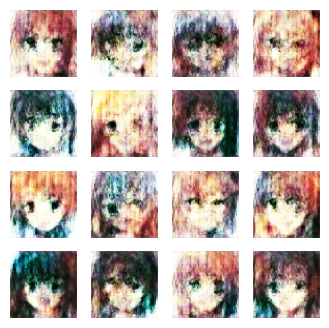

animeGenerated_wgan_0epochs


/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


Output of the calculating FID command:
FID:  297.3842187304329

FID_scores:  [297.3842187304329]
237/237 [==============================] - 308s 1s/step - d_loss: -31.2693 - g_loss: 62.8276 - lr: 1.3000e-04
Epoch 2/802
237/237 [==============================] - 163s 689ms/step - d_loss: -13.3424 - g_loss: 81.1609 - lr: 1.3000e-04
Epoch 3/802
237/237 [==============================] - 163s 689ms/step - d_loss: -10.4609 - g_loss: 66.4389 - lr: 1.3000e-04
Epoch 4/802
237/237 [==============================] - 163s 689ms/step - d_loss: -9.0152 - g_loss: 67.1688 - lr: 1.3000e-04
Epoch 5/802
237/237 [==============================] - 163s 689ms/step - d_loss: -7.7316 - g_loss: 60.4129 - lr: 1.2999e-04
Epoch 6/802
237/237 [==============================] - 163s 689ms/step - d_loss: -6.8780 - g_loss: 55.9723 - lr: 1.2999e-04
Epoch 7/802
237/237 [==============================] - 163s 689ms/step - d_loss: -6.5014 - g_loss: 59.0248 - lr: 1.2999e-04
Epoch 8/802
237/237 [==========================

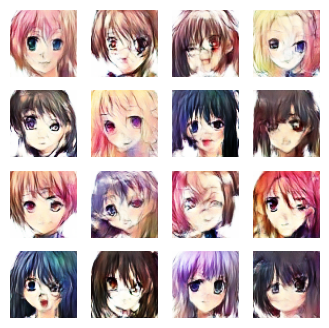

animeGenerated_wgan_10epochs


Output of the calculating FID command:
FID:  60.97684434139208

FID_scores:  [297.3842187304329, 60.97684434139208]
237/237 [==============================] - 180s 760ms/step - d_loss: -5.1385 - g_loss: 44.1022 - lr: 1.2999e-04
Epoch 12/802
237/237 [==============================] - 163s 689ms/step - d_loss: -4.9662 - g_loss: 42.0874 - lr: 1.2998e-04
Epoch 13/802
237/237 [==============================] - 163s 689ms/step - d_loss: -4.8485 - g_loss: 42.9678 - lr: 1.2998e-04
Epoch 14/802
237/237 [==============================] - 164s 690ms/step - d_loss: -4.6510 - g_loss: 41.4184 - lr: 1.2998e-04
Epoch 15/802
237/237 [==============================] - 163s 689ms/step - d_loss: -4.4842 - g_loss: 41.5247 - lr: 1.2998e-04
Epoch 16/802
237/237 [==============================] - 163s 689ms/step - d_loss: -4.4264 - g_loss: 40.8292 - lr: 1.2998e-04
Epoch 17/802
237/237 [==============================] - 163s 689ms/step - d_loss: -4.2809 - g_loss: 39.0004 - lr: 1.2998e-04
Epoch 18/802
237/237 [

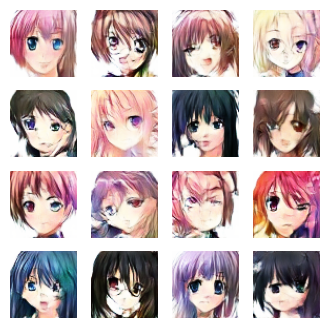

animeGenerated_wgan_20epochs


Output of the calculating FID command:
FID:  42.49609031358017

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017]
237/237 [==============================] - 181s 764ms/step - d_loss: -3.8058 - g_loss: 41.0577 - lr: 1.2997e-04
Epoch 22/802
237/237 [==============================] - 163s 689ms/step - d_loss: -3.6886 - g_loss: 38.2669 - lr: 1.2997e-04
Epoch 23/802
237/237 [==============================] - 163s 689ms/step - d_loss: -3.6080 - g_loss: 36.4024 - lr: 1.2997e-04
Epoch 24/802
237/237 [==============================] - 163s 689ms/step - d_loss: -3.5257 - g_loss: 35.0617 - lr: 1.2997e-04
Epoch 25/802
237/237 [==============================] - 163s 689ms/step - d_loss: -3.4864 - g_loss: 34.0491 - lr: 1.2997e-04
Epoch 26/802
237/237 [==============================] - 163s 689ms/step - d_loss: -3.3639 - g_loss: 32.2820 - lr: 1.2997e-04
Epoch 27/802
237/237 [==============================] - 163s 689ms/step - d_loss: -3.3232 - g_loss: 31.6036 - lr: 1.2996e-04
Epo

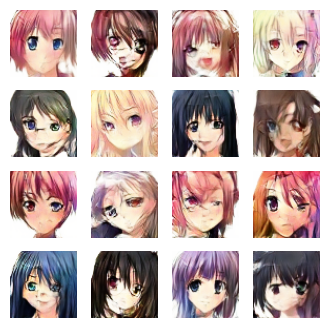

animeGenerated_wgan_30epochs


Output of the calculating FID command:
FID:  35.432618714737714

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714]
237/237 [==============================] - 180s 760ms/step - d_loss: -3.1049 - g_loss: 33.3412 - lr: 1.2996e-04
Epoch 32/802
237/237 [==============================] - 163s 689ms/step - d_loss: -2.9784 - g_loss: 32.9444 - lr: 1.2996e-04
Epoch 33/802
237/237 [==============================] - 163s 689ms/step - d_loss: -2.9421 - g_loss: 30.3972 - lr: 1.2996e-04
Epoch 34/802
237/237 [==============================] - 163s 689ms/step - d_loss: -2.9204 - g_loss: 32.2032 - lr: 1.2995e-04
Epoch 35/802
237/237 [==============================] - 163s 689ms/step - d_loss: -2.8333 - g_loss: 32.2331 - lr: 1.2995e-04
Epoch 36/802
237/237 [==============================] - 163s 689ms/step - d_loss: -2.7890 - g_loss: 31.5843 - lr: 1.2995e-04
Epoch 37/802
237/237 [==============================] - 163s 689ms/step - d_loss: -2.7347 - g_loss: 32.5024

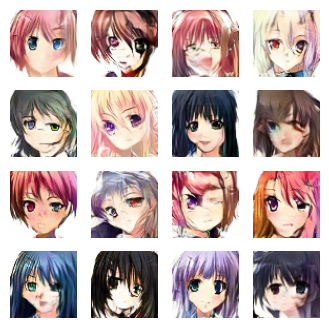

animeGenerated_wgan_40epochs


Output of the calculating FID command:
FID:  32.282034720672414

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414]
237/237 [==============================] - 180s 760ms/step - d_loss: -2.6058 - g_loss: 32.2008 - lr: 1.2995e-04
Epoch 42/802
237/237 [==============================] - 163s 689ms/step - d_loss: -2.5563 - g_loss: 33.5438 - lr: 1.2994e-04
Epoch 43/802
237/237 [==============================] - 163s 689ms/step - d_loss: -2.4912 - g_loss: 34.7739 - lr: 1.2994e-04
Epoch 44/802
237/237 [==============================] - 163s 689ms/step - d_loss: -2.5137 - g_loss: 34.5452 - lr: 1.2994e-04
Epoch 45/802
237/237 [==============================] - 163s 689ms/step - d_loss: -2.4149 - g_loss: 32.4502 - lr: 1.2994e-04
Epoch 46/802
237/237 [==============================] - 163s 689ms/step - d_loss: -2.4218 - g_loss: 31.0872 - lr: 1.2994e-04
Epoch 47/802
237/237 [==============================] - 163s 689ms/step - d_loss: -2.34

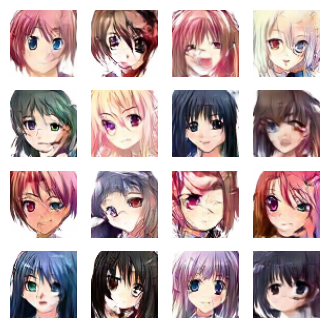

animeGenerated_wgan_50epochs


Output of the calculating FID command:
FID:  29.852768024021884

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884]
237/237 [==============================] - 181s 762ms/step - d_loss: -2.2158 - g_loss: 30.5043 - lr: 1.2993e-04
Epoch 52/802
237/237 [==============================] - 163s 689ms/step - d_loss: -2.1638 - g_loss: 28.7519 - lr: 1.2993e-04
Epoch 53/802
237/237 [==============================] - 163s 689ms/step - d_loss: -2.1677 - g_loss: 28.0858 - lr: 1.2993e-04
Epoch 54/802
237/237 [==============================] - 163s 689ms/step - d_loss: -2.1432 - g_loss: 27.6154 - lr: 1.2993e-04
Epoch 55/802
237/237 [==============================] - 163s 689ms/step - d_loss: -2.1033 - g_loss: 29.1179 - lr: 1.2993e-04
Epoch 56/802
237/237 [==============================] - 163s 689ms/step - d_loss: -2.0520 - g_loss: 29.5458 - lr: 1.2992e-04
Epoch 57/802
237/237 [==============================] - 163s 689ms/

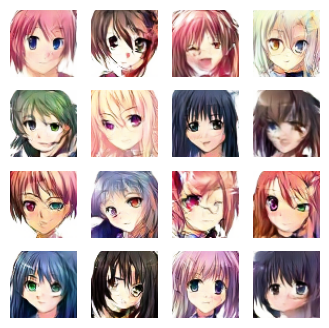

animeGenerated_wgan_60epochs


Output of the calculating FID command:
FID:  26.28640065762295

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884, 26.28640065762295]
237/237 [==============================] - 181s 765ms/step - d_loss: -1.8760 - g_loss: 26.1272 - lr: 1.2992e-04
Epoch 62/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.9289 - g_loss: 25.6188 - lr: 1.2992e-04
Epoch 63/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.9028 - g_loss: 24.8350 - lr: 1.2992e-04
Epoch 64/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.8979 - g_loss: 23.5470 - lr: 1.2991e-04
Epoch 65/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.8877 - g_loss: 24.4624 - lr: 1.2991e-04
Epoch 66/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.8678 - g_loss: 23.3412 - lr: 1.2991e-04
Epoch 67/802
237/237 [===========================

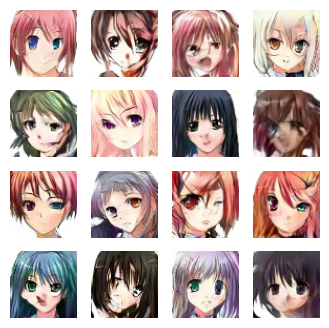

animeGenerated_wgan_70epochs


Output of the calculating FID command:
FID:  27.9968025091369

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884, 26.28640065762295, 27.9968025091369]
237/237 [==============================] - 180s 760ms/step - d_loss: -1.7672 - g_loss: 21.7126 - lr: 1.2990e-04
Epoch 72/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.7548 - g_loss: 20.6675 - lr: 1.2990e-04
Epoch 73/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.7362 - g_loss: 21.3602 - lr: 1.2990e-04
Epoch 74/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.7033 - g_loss: 21.3375 - lr: 1.2990e-04
Epoch 75/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.6886 - g_loss: 21.0347 - lr: 1.2990e-04
Epoch 76/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.6888 - g_loss: 21.1456 - lr: 1.2990e-04
Epoch 77/802
237/237 [==========

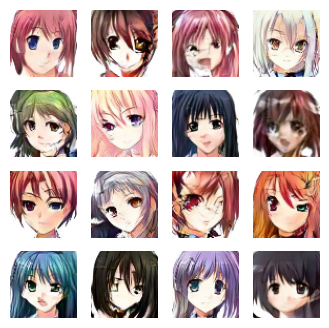

animeGenerated_wgan_80epochs


Output of the calculating FID command:
FID:  25.671734417948954

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884, 26.28640065762295, 27.9968025091369, 25.671734417948954]
237/237 [==============================] - 180s 759ms/step - d_loss: -1.6214 - g_loss: 20.1700 - lr: 1.2989e-04
Epoch 82/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.5743 - g_loss: 18.8814 - lr: 1.2989e-04
Epoch 83/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.5649 - g_loss: 18.0303 - lr: 1.2989e-04
Epoch 84/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.5303 - g_loss: 17.4378 - lr: 1.2989e-04
Epoch 85/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.5261 - g_loss: 18.6461 - lr: 1.2988e-04
Epoch 86/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.5476 - g_loss: 18.0493 - lr: 1.2988e-04
Epoch 87/8

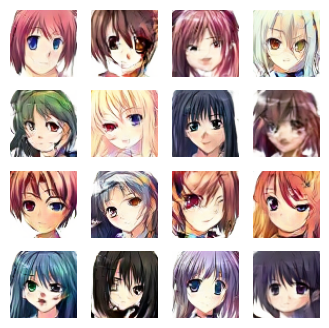

animeGenerated_wgan_90epochs


Output of the calculating FID command:
FID:  23.595382791911504

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884, 26.28640065762295, 27.9968025091369, 25.671734417948954, 23.595382791911504]
237/237 [==============================] - 180s 760ms/step - d_loss: -1.4573 - g_loss: 17.5029 - lr: 1.2988e-04
Epoch 92/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.4155 - g_loss: 16.8363 - lr: 1.2988e-04
Epoch 93/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.4012 - g_loss: 17.0457 - lr: 1.2987e-04
Epoch 94/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.4009 - g_loss: 17.2398 - lr: 1.2987e-04
Epoch 95/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.3703 - g_loss: 16.5916 - lr: 1.2987e-04
Epoch 96/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.3548 - g_loss: 16.3030 - lr: 1

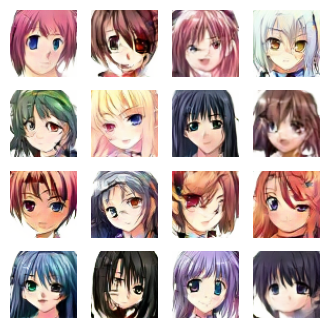

animeGenerated_wgan_100epochs


Output of the calculating FID command:
FID:  24.00506405680528

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884, 26.28640065762295, 27.9968025091369, 25.671734417948954, 23.595382791911504, 24.00506405680528]
[297.38421873  60.97684434  42.49609031  35.43261871  32.28203472
  29.85276802  26.28640066  27.99680251  25.67173442  23.59538279
  24.00506406]


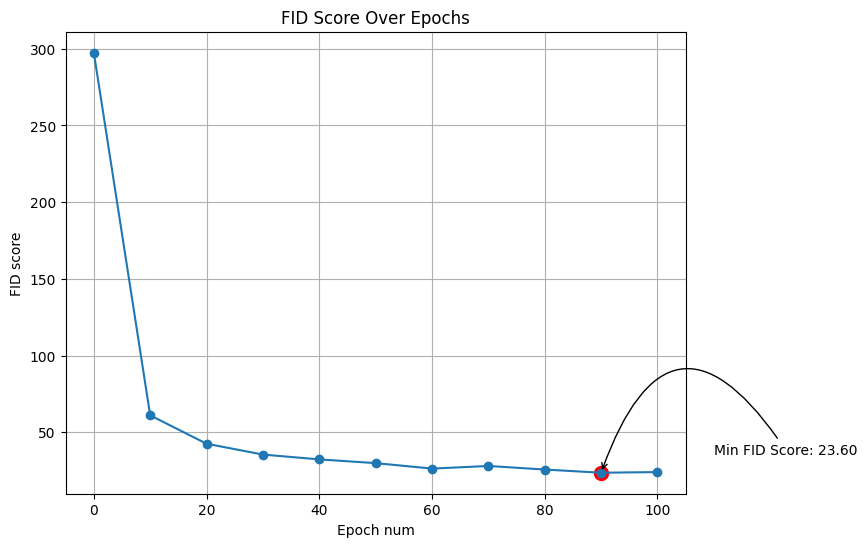

237/237 [==============================] - 180s 760ms/step - d_loss: -1.3047 - g_loss: 16.3952 - lr: 1.2986e-04
Epoch 102/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.2905 - g_loss: 16.7703 - lr: 1.2986e-04
Epoch 103/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.2536 - g_loss: 16.3455 - lr: 1.2986e-04
Epoch 104/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.2325 - g_loss: 16.8439 - lr: 1.2986e-04
Epoch 105/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.2119 - g_loss: 16.9403 - lr: 1.2986e-04
Epoch 106/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.2295 - g_loss: 16.9522 - lr: 1.2986e-04
Epoch 107/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.2034 - g_loss: 15.8928 - lr: 1.2985e-04
Epoch 108/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.1887 - g_loss: 15.9436 - lr: 1.2985e-04
Epoch 

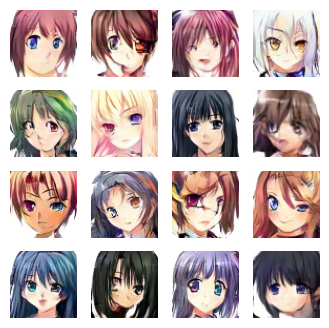

animeGenerated_wgan_110epochs


Output of the calculating FID command:
FID:  24.5704907789667

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884, 26.28640065762295, 27.9968025091369, 25.671734417948954, 23.595382791911504, 24.00506405680528, 24.5704907789667]
[297.38421873  60.97684434  42.49609031  35.43261871  32.28203472
  29.85276802  26.28640066  27.99680251  25.67173442  23.59538279
  24.00506406  24.57049078]


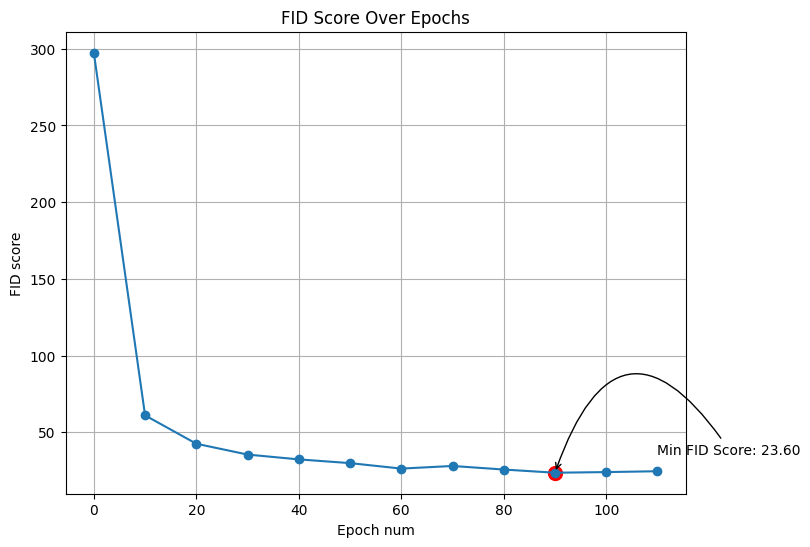

237/237 [==============================] - 180s 761ms/step - d_loss: -1.1792 - g_loss: 15.8122 - lr: 1.2985e-04
Epoch 112/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.1678 - g_loss: 15.0566 - lr: 1.2985e-04
Epoch 113/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.1441 - g_loss: 14.8105 - lr: 1.2985e-04
Epoch 114/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.1447 - g_loss: 14.5226 - lr: 1.2985e-04
Epoch 115/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.1293 - g_loss: 14.5152 - lr: 1.2984e-04
Epoch 116/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.0979 - g_loss: 14.4672 - lr: 1.2984e-04
Epoch 117/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.0866 - g_loss: 14.7340 - lr: 1.2984e-04
Epoch 118/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.0751 - g_loss: 14.0871 - lr: 1.2984e-04
Epoch 

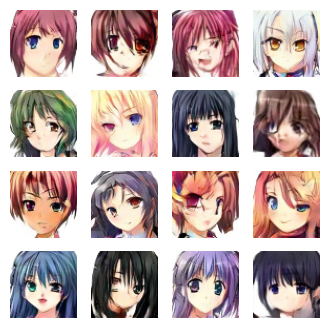

animeGenerated_wgan_120epochs


Output of the calculating FID command:
FID:  23.05014699591598

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884, 26.28640065762295, 27.9968025091369, 25.671734417948954, 23.595382791911504, 24.00506405680528, 24.5704907789667, 23.05014699591598]
[297.38421873  60.97684434  42.49609031  35.43261871  32.28203472
  29.85276802  26.28640066  27.99680251  25.67173442  23.59538279
  24.00506406  24.57049078  23.050147  ]


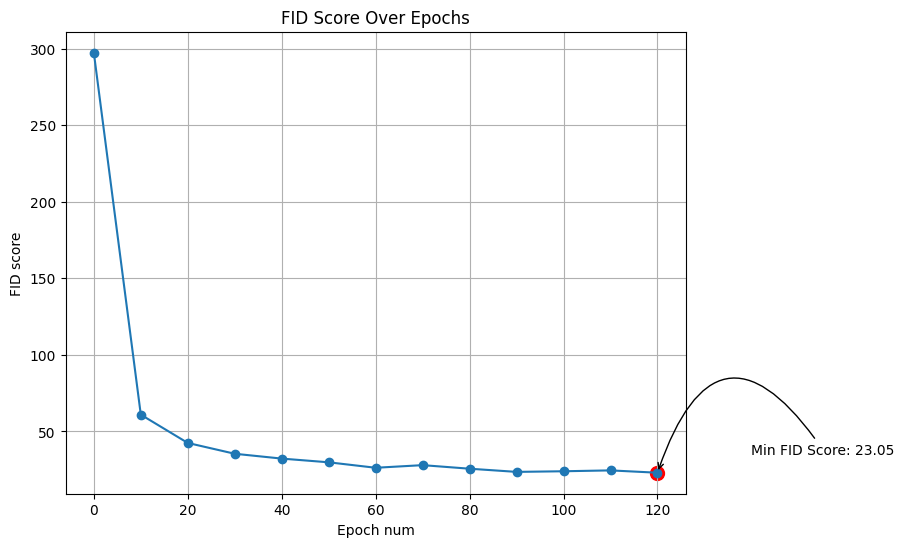

237/237 [==============================] - 181s 763ms/step - d_loss: -1.0713 - g_loss: 14.6386 - lr: 1.2984e-04
Epoch 122/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.0298 - g_loss: 14.2843 - lr: 1.2983e-04
Epoch 123/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.0205 - g_loss: 13.8392 - lr: 1.2983e-04
Epoch 124/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.0331 - g_loss: 13.5717 - lr: 1.2983e-04
Epoch 125/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.9792 - g_loss: 13.3514 - lr: 1.2983e-04
Epoch 126/802
237/237 [==============================] - 163s 689ms/step - d_loss: -1.0150 - g_loss: 12.6990 - lr: 1.2983e-04
Epoch 127/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.9748 - g_loss: 12.4745 - lr: 1.2983e-04
Epoch 128/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.9739 - g_loss: 12.7585 - lr: 1.2983e-04
Epoch 

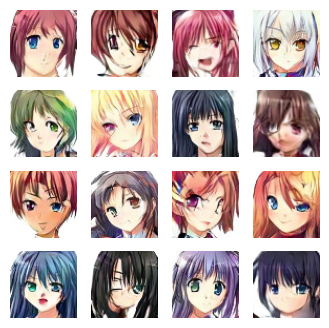

animeGenerated_wgan_130epochs


Output of the calculating FID command:
FID:  23.365371124678546

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884, 26.28640065762295, 27.9968025091369, 25.671734417948954, 23.595382791911504, 24.00506405680528, 24.5704907789667, 23.05014699591598, 23.365371124678546]
[297.38421873  60.97684434  42.49609031  35.43261871  32.28203472
  29.85276802  26.28640066  27.99680251  25.67173442  23.59538279
  24.00506406  24.57049078  23.050147    23.36537112]


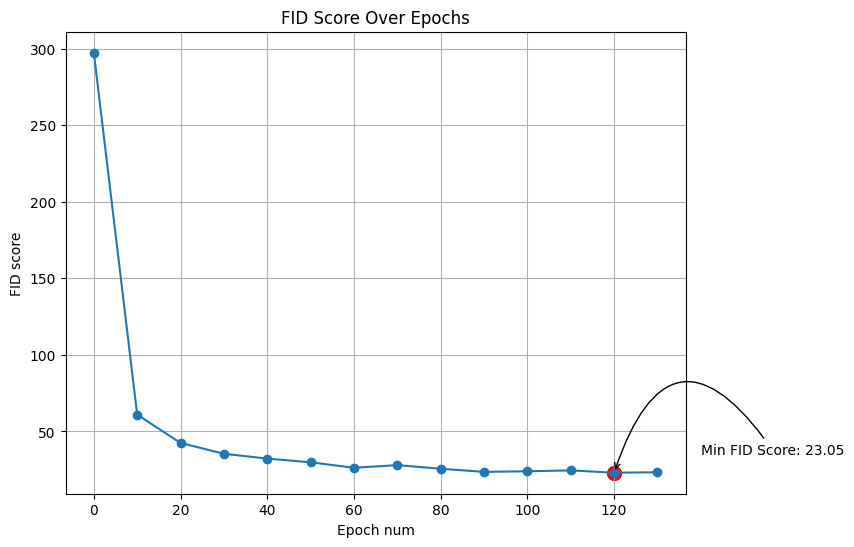

237/237 [==============================] - 181s 763ms/step - d_loss: -0.9198 - g_loss: 13.5425 - lr: 1.2982e-04
Epoch 132/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.8824 - g_loss: 12.9988 - lr: 1.2982e-04
Epoch 133/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.9221 - g_loss: 13.0861 - lr: 1.2982e-04
Epoch 134/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.9347 - g_loss: 13.4146 - lr: 1.2982e-04
Epoch 135/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.8917 - g_loss: 12.7721 - lr: 1.2982e-04
Epoch 136/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.8804 - g_loss: 12.1853 - lr: 1.2982e-04
Epoch 137/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.8621 - g_loss: 12.9169 - lr: 1.2981e-04
Epoch 138/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.8545 - g_loss: 12.5953 - lr: 1.2981e-04
Epoch 

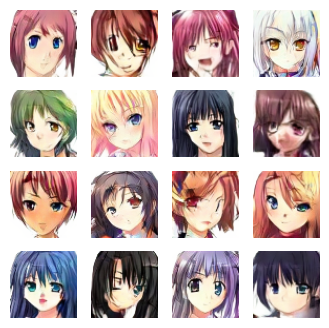

animeGenerated_wgan_140epochs


Output of the calculating FID command:
FID:  20.20282896700988

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884, 26.28640065762295, 27.9968025091369, 25.671734417948954, 23.595382791911504, 24.00506405680528, 24.5704907789667, 23.05014699591598, 23.365371124678546, 20.20282896700988]
[297.38421873  60.97684434  42.49609031  35.43261871  32.28203472
  29.85276802  26.28640066  27.99680251  25.67173442  23.59538279
  24.00506406  24.57049078  23.050147    23.36537112  20.20282897]


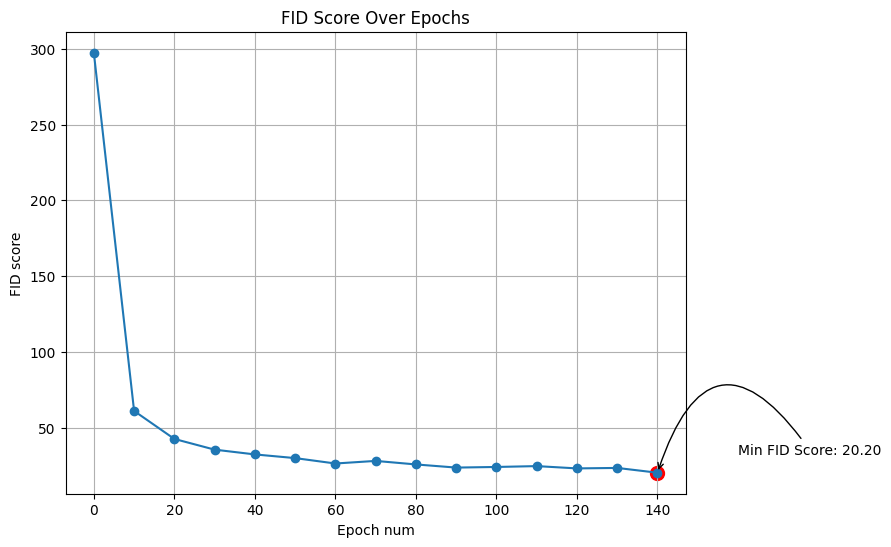

237/237 [==============================] - 181s 766ms/step - d_loss: -0.8243 - g_loss: 12.2409 - lr: 1.2981e-04
Epoch 142/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.8200 - g_loss: 12.4486 - lr: 1.2981e-04
Epoch 143/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.8027 - g_loss: 12.0662 - lr: 1.2981e-04
Epoch 144/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.7887 - g_loss: 12.1561 - lr: 1.2980e-04
Epoch 145/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.7888 - g_loss: 11.4479 - lr: 1.2980e-04
Epoch 146/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.7713 - g_loss: 11.6071 - lr: 1.2980e-04
Epoch 147/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.7638 - g_loss: 11.0764 - lr: 1.2980e-04
Epoch 148/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.7318 - g_loss: 11.3623 - lr: 1.2980e-04
Epoch 

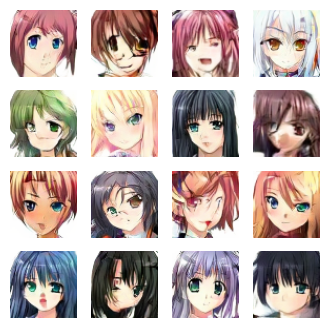

animeGenerated_wgan_150epochs


Output of the calculating FID command:
FID:  21.013603356601607

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884, 26.28640065762295, 27.9968025091369, 25.671734417948954, 23.595382791911504, 24.00506405680528, 24.5704907789667, 23.05014699591598, 23.365371124678546, 20.20282896700988, 21.013603356601607]
[297.38421873  60.97684434  42.49609031  35.43261871  32.28203472
  29.85276802  26.28640066  27.99680251  25.67173442  23.59538279
  24.00506406  24.57049078  23.050147    23.36537112  20.20282897
  21.01360336]


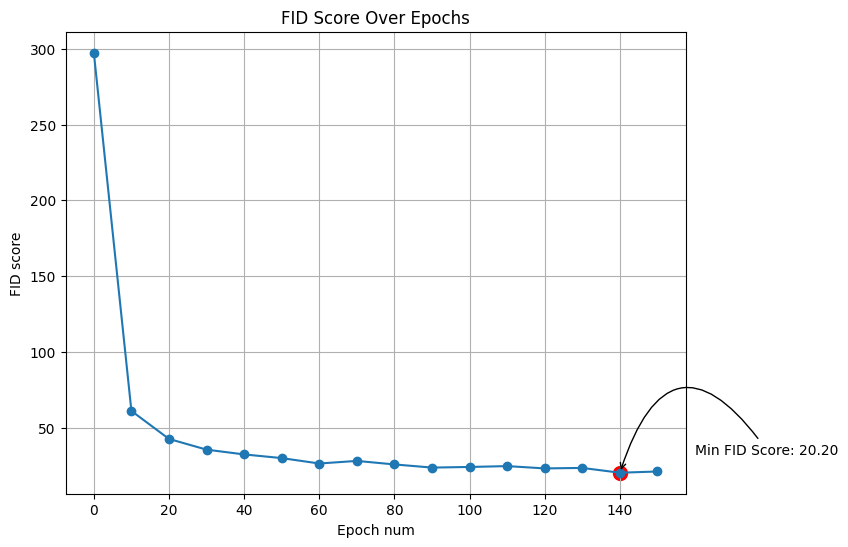

237/237 [==============================] - 181s 762ms/step - d_loss: -0.6925 - g_loss: 11.0676 - lr: 1.2979e-04
Epoch 152/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.7291 - g_loss: 11.0795 - lr: 1.2979e-04
Epoch 153/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.7136 - g_loss: 11.1312 - lr: 1.2979e-04
Epoch 154/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.6546 - g_loss: 11.0046 - lr: 1.2979e-04
Epoch 155/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.6877 - g_loss: 10.8535 - lr: 1.2979e-04
Epoch 156/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.6638 - g_loss: 10.6317 - lr: 1.2979e-04
Epoch 157/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.6565 - g_loss: 10.0565 - lr: 1.2979e-04
Epoch 158/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.6279 - g_loss: 10.0261 - lr: 1.2979e-04
Epoch 

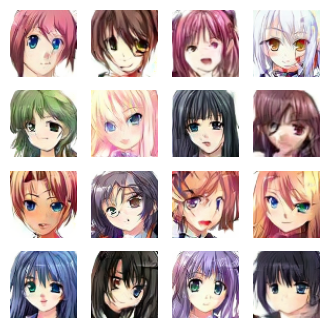

animeGenerated_wgan_160epochs


Output of the calculating FID command:
FID:  19.515331553423437

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884, 26.28640065762295, 27.9968025091369, 25.671734417948954, 23.595382791911504, 24.00506405680528, 24.5704907789667, 23.05014699591598, 23.365371124678546, 20.20282896700988, 21.013603356601607, 19.515331553423437]
[297.38421873  60.97684434  42.49609031  35.43261871  32.28203472
  29.85276802  26.28640066  27.99680251  25.67173442  23.59538279
  24.00506406  24.57049078  23.050147    23.36537112  20.20282897
  21.01360336  19.51533155]


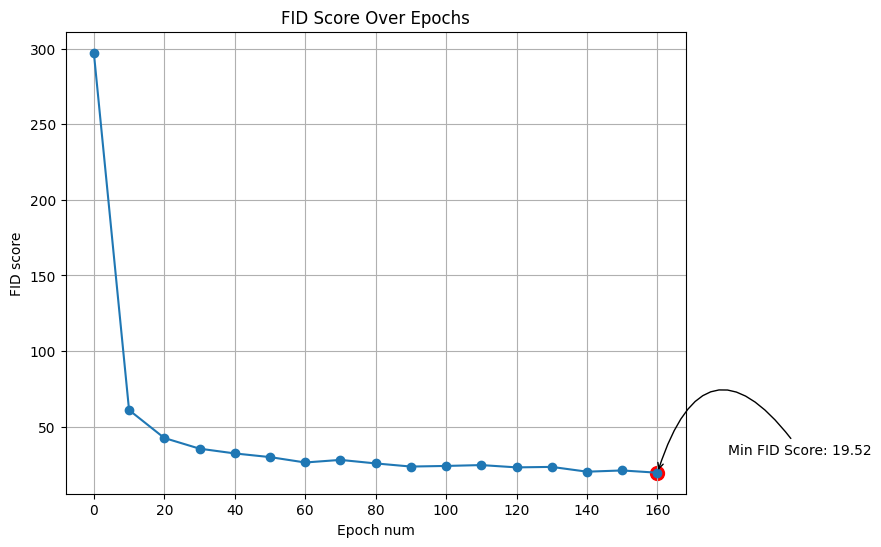

237/237 [==============================] - 181s 764ms/step - d_loss: -0.6286 - g_loss: 9.8703 - lr: 1.2978e-04
Epoch 162/802
237/237 [==============================] - 164s 689ms/step - d_loss: -0.6066 - g_loss: 9.6731 - lr: 1.2978e-04
Epoch 163/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.6132 - g_loss: 9.8380 - lr: 1.2978e-04
Epoch 164/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.5921 - g_loss: 9.1906 - lr: 1.2978e-04
Epoch 165/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.5723 - g_loss: 9.3532 - lr: 1.2978e-04
Epoch 166/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.6163 - g_loss: 9.2745 - lr: 1.2977e-04
Epoch 167/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.5650 - g_loss: 9.7270 - lr: 1.2977e-04
Epoch 168/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.5406 - g_loss: 9.4141 - lr: 1.2977e-04
Epoch 169/802


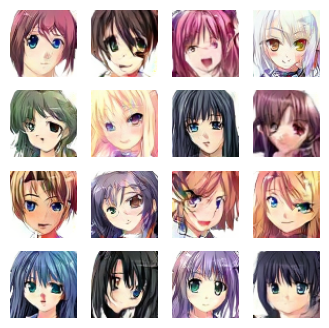

animeGenerated_wgan_170epochs


Output of the calculating FID command:
FID:  20.85235096837826

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884, 26.28640065762295, 27.9968025091369, 25.671734417948954, 23.595382791911504, 24.00506405680528, 24.5704907789667, 23.05014699591598, 23.365371124678546, 20.20282896700988, 21.013603356601607, 19.515331553423437, 20.85235096837826]
[297.38421873  60.97684434  42.49609031  35.43261871  32.28203472
  29.85276802  26.28640066  27.99680251  25.67173442  23.59538279
  24.00506406  24.57049078  23.050147    23.36537112  20.20282897
  21.01360336  19.51533155  20.85235097]


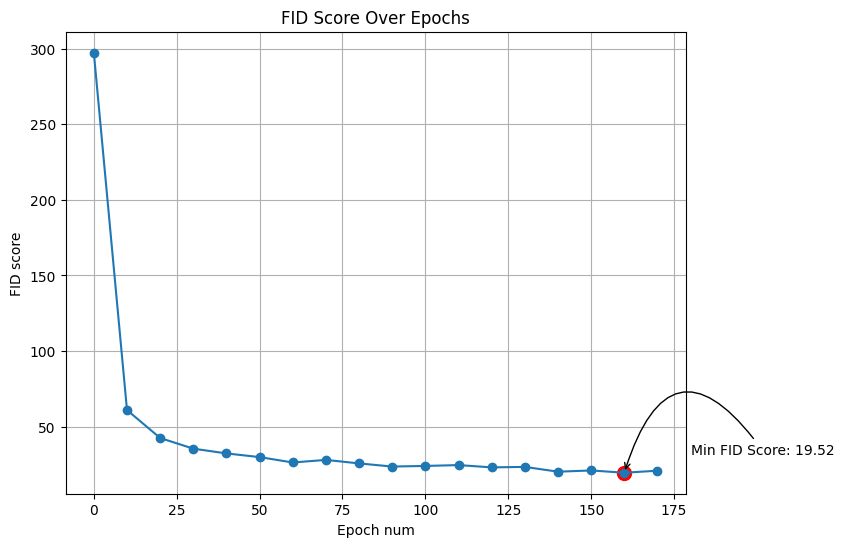

237/237 [==============================] - 182s 767ms/step - d_loss: -0.5316 - g_loss: 9.1753 - lr: 1.2977e-04
Epoch 172/802
237/237 [==============================] - 164s 689ms/step - d_loss: -0.5058 - g_loss: 8.9479 - lr: 1.2977e-04
Epoch 173/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.5153 - g_loss: 9.0041 - lr: 1.2976e-04
Epoch 174/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.5052 - g_loss: 8.8183 - lr: 1.2976e-04
Epoch 175/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.5101 - g_loss: 8.8819 - lr: 1.2976e-04
Epoch 176/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.4760 - g_loss: 8.8403 - lr: 1.2976e-04
Epoch 177/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.4902 - g_loss: 8.7972 - lr: 1.2976e-04
Epoch 178/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.4671 - g_loss: 8.7820 - lr: 1.2976e-04
Epoch 179/802


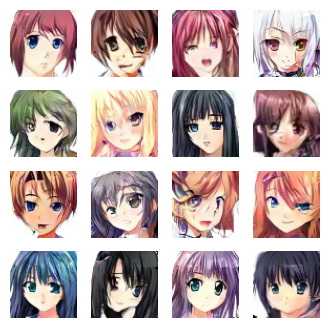

animeGenerated_wgan_180epochs


Output of the calculating FID command:
FID:  21.10220780713985

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884, 26.28640065762295, 27.9968025091369, 25.671734417948954, 23.595382791911504, 24.00506405680528, 24.5704907789667, 23.05014699591598, 23.365371124678546, 20.20282896700988, 21.013603356601607, 19.515331553423437, 20.85235096837826, 21.10220780713985]
[297.38421873  60.97684434  42.49609031  35.43261871  32.28203472
  29.85276802  26.28640066  27.99680251  25.67173442  23.59538279
  24.00506406  24.57049078  23.050147    23.36537112  20.20282897
  21.01360336  19.51533155  20.85235097  21.10220781]


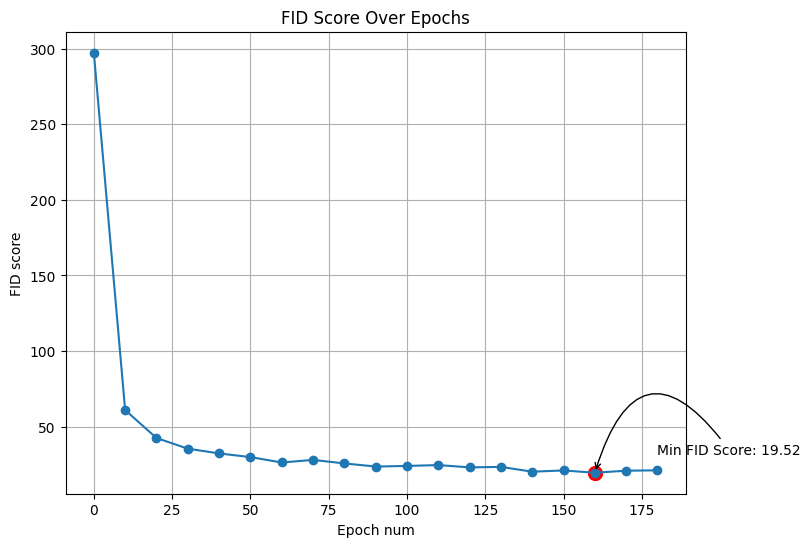

237/237 [==============================] - 180s 759ms/step - d_loss: -0.4433 - g_loss: 8.8156 - lr: 1.2975e-04
Epoch 182/802
237/237 [==============================] - 164s 689ms/step - d_loss: -0.4252 - g_loss: 8.4800 - lr: 1.2975e-04
Epoch 183/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.4212 - g_loss: 8.5052 - lr: 1.2975e-04
Epoch 184/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.4086 - g_loss: 8.2306 - lr: 1.2975e-04
Epoch 185/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.4213 - g_loss: 8.3156 - lr: 1.2975e-04
Epoch 186/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.4123 - g_loss: 8.5878 - lr: 1.2975e-04
Epoch 187/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.4008 - g_loss: 7.9475 - lr: 1.2975e-04
Epoch 188/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.3950 - g_loss: 7.8830 - lr: 1.2974e-04
Epoch 189/802


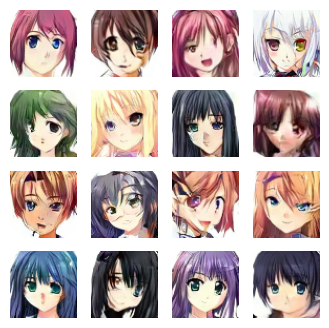

animeGenerated_wgan_190epochs


Output of the calculating FID command:
FID:  20.84627962124273

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884, 26.28640065762295, 27.9968025091369, 25.671734417948954, 23.595382791911504, 24.00506405680528, 24.5704907789667, 23.05014699591598, 23.365371124678546, 20.20282896700988, 21.013603356601607, 19.515331553423437, 20.85235096837826, 21.10220780713985, 20.84627962124273]
[297.38421873  60.97684434  42.49609031  35.43261871  32.28203472
  29.85276802  26.28640066  27.99680251  25.67173442  23.59538279
  24.00506406  24.57049078  23.050147    23.36537112  20.20282897
  21.01360336  19.51533155  20.85235097  21.10220781  20.84627962]


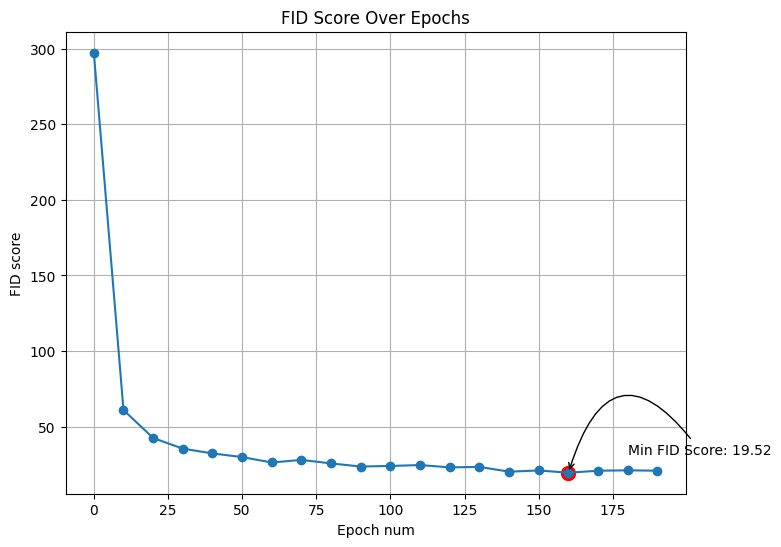

237/237 [==============================] - 181s 762ms/step - d_loss: -0.3675 - g_loss: 7.7973 - lr: 1.2974e-04
Epoch 192/802
237/237 [==============================] - 164s 689ms/step - d_loss: -0.3440 - g_loss: 7.4024 - lr: 1.2974e-04
Epoch 193/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.3566 - g_loss: 7.7602 - lr: 1.2974e-04
Epoch 194/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.3547 - g_loss: 7.4117 - lr: 1.2974e-04
Epoch 195/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.3432 - g_loss: 7.1666 - lr: 1.2973e-04
Epoch 196/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.3231 - g_loss: 7.1126 - lr: 1.2973e-04
Epoch 197/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.3170 - g_loss: 7.3718 - lr: 1.2973e-04
Epoch 198/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.3285 - g_loss: 7.5595 - lr: 1.2973e-04
Epoch 199/802


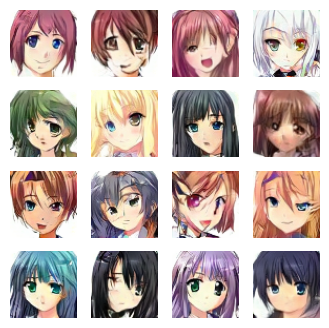

animeGenerated_wgan_200epochs


Output of the calculating FID command:
FID:  19.990243070196954

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884, 26.28640065762295, 27.9968025091369, 25.671734417948954, 23.595382791911504, 24.00506405680528, 24.5704907789667, 23.05014699591598, 23.365371124678546, 20.20282896700988, 21.013603356601607, 19.515331553423437, 20.85235096837826, 21.10220780713985, 20.84627962124273, 19.990243070196954]
[297.38421873  60.97684434  42.49609031  35.43261871  32.28203472
  29.85276802  26.28640066  27.99680251  25.67173442  23.59538279
  24.00506406  24.57049078  23.050147    23.36537112  20.20282897
  21.01360336  19.51533155  20.85235097  21.10220781  20.84627962
  19.99024307]


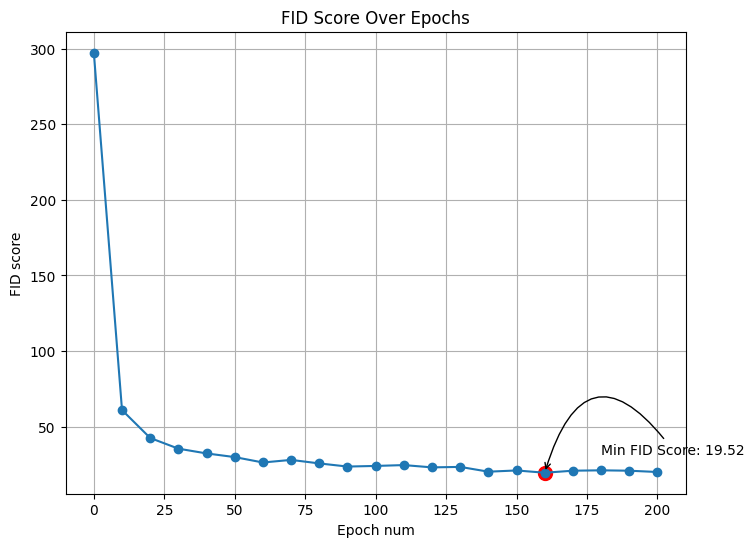

237/237 [==============================] - 180s 761ms/step - d_loss: -0.3184 - g_loss: 7.2333 - lr: 1.2973e-04
Epoch 202/802
237/237 [==============================] - 164s 690ms/step - d_loss: -0.3067 - g_loss: 7.1690 - lr: 1.2972e-04
Epoch 203/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.2947 - g_loss: 7.4302 - lr: 1.2972e-04
Epoch 204/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.2825 - g_loss: 7.5239 - lr: 1.2972e-04
Epoch 205/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.2907 - g_loss: 7.3351 - lr: 1.2972e-04
Epoch 206/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.2692 - g_loss: 7.4539 - lr: 1.2972e-04
Epoch 207/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.2626 - g_loss: 7.3844 - lr: 1.2972e-04
Epoch 208/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.2546 - g_loss: 7.2984 - lr: 1.2972e-04
Epoch 209/802


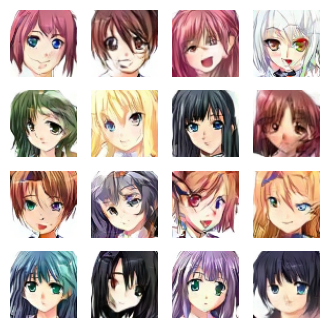

animeGenerated_wgan_210epochs


Output of the calculating FID command:
FID:  21.54297259650147

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884, 26.28640065762295, 27.9968025091369, 25.671734417948954, 23.595382791911504, 24.00506405680528, 24.5704907789667, 23.05014699591598, 23.365371124678546, 20.20282896700988, 21.013603356601607, 19.515331553423437, 20.85235096837826, 21.10220780713985, 20.84627962124273, 19.990243070196954, 21.54297259650147]
[297.38421873  60.97684434  42.49609031  35.43261871  32.28203472
  29.85276802  26.28640066  27.99680251  25.67173442  23.59538279
  24.00506406  24.57049078  23.050147    23.36537112  20.20282897
  21.01360336  19.51533155  20.85235097  21.10220781  20.84627962
  19.99024307  21.5429726 ]


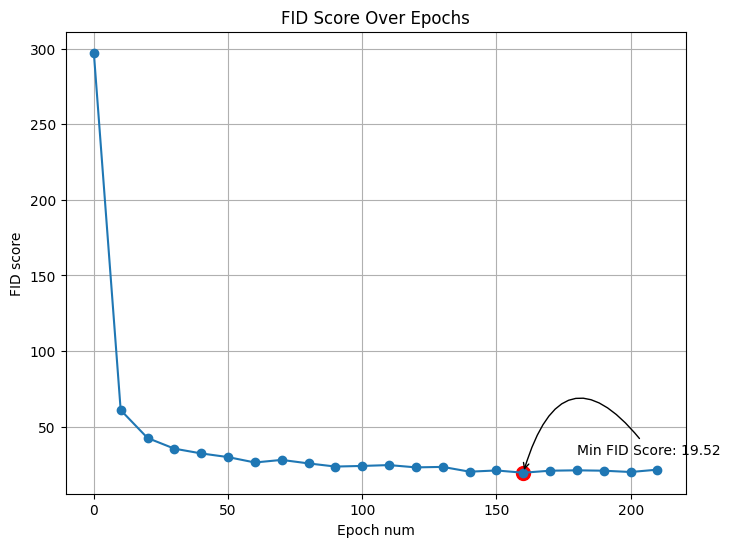

237/237 [==============================] - 182s 766ms/step - d_loss: -0.2515 - g_loss: 6.9897 - lr: 1.2971e-04
Epoch 212/802
237/237 [==============================] - 164s 689ms/step - d_loss: -0.2282 - g_loss: 6.6619 - lr: 1.2971e-04
Epoch 213/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.2323 - g_loss: 6.7880 - lr: 1.2971e-04
Epoch 214/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.2168 - g_loss: 6.8304 - lr: 1.2971e-04
Epoch 215/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.2394 - g_loss: 6.9267 - lr: 1.2971e-04
Epoch 216/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.2118 - g_loss: 6.7546 - lr: 1.2971e-04
Epoch 217/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.1982 - g_loss: 6.7876 - lr: 1.2970e-04
Epoch 218/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.1863 - g_loss: 6.7993 - lr: 1.2970e-04
Epoch 219/802


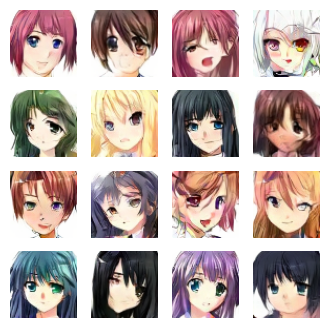

animeGenerated_wgan_220epochs


Output of the calculating FID command:
FID:  21.980716855153418

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884, 26.28640065762295, 27.9968025091369, 25.671734417948954, 23.595382791911504, 24.00506405680528, 24.5704907789667, 23.05014699591598, 23.365371124678546, 20.20282896700988, 21.013603356601607, 19.515331553423437, 20.85235096837826, 21.10220780713985, 20.84627962124273, 19.990243070196954, 21.54297259650147, 21.980716855153418]
[297.38421873  60.97684434  42.49609031  35.43261871  32.28203472
  29.85276802  26.28640066  27.99680251  25.67173442  23.59538279
  24.00506406  24.57049078  23.050147    23.36537112  20.20282897
  21.01360336  19.51533155  20.85235097  21.10220781  20.84627962
  19.99024307  21.5429726   21.98071686]


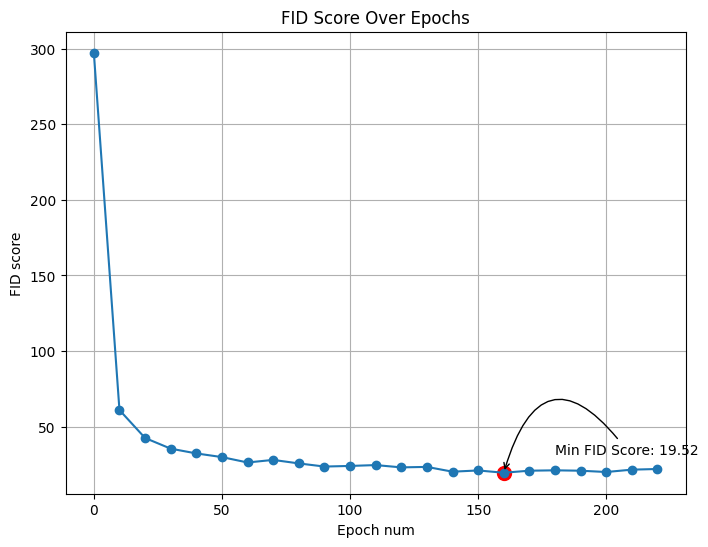

237/237 [==============================] - 180s 761ms/step - d_loss: -0.1804 - g_loss: 6.4866 - lr: 1.2970e-04
Epoch 222/802
237/237 [==============================] - 164s 689ms/step - d_loss: -0.1645 - g_loss: 6.1933 - lr: 1.2970e-04
Epoch 223/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.1565 - g_loss: 6.1528 - lr: 1.2970e-04
Epoch 224/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.1636 - g_loss: 6.1847 - lr: 1.2969e-04
Epoch 225/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.1546 - g_loss: 6.0789 - lr: 1.2969e-04
Epoch 226/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.1523 - g_loss: 5.7894 - lr: 1.2969e-04
Epoch 227/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.1450 - g_loss: 5.7266 - lr: 1.2969e-04
Epoch 228/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.1518 - g_loss: 5.9978 - lr: 1.2969e-04
Epoch 229/802


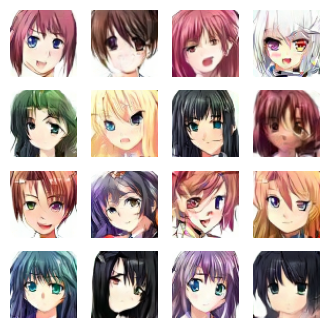

animeGenerated_wgan_230epochs


Output of the calculating FID command:
FID:  21.945344551876275

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884, 26.28640065762295, 27.9968025091369, 25.671734417948954, 23.595382791911504, 24.00506405680528, 24.5704907789667, 23.05014699591598, 23.365371124678546, 20.20282896700988, 21.013603356601607, 19.515331553423437, 20.85235096837826, 21.10220780713985, 20.84627962124273, 19.990243070196954, 21.54297259650147, 21.980716855153418, 21.945344551876275]
[297.38421873  60.97684434  42.49609031  35.43261871  32.28203472
  29.85276802  26.28640066  27.99680251  25.67173442  23.59538279
  24.00506406  24.57049078  23.050147    23.36537112  20.20282897
  21.01360336  19.51533155  20.85235097  21.10220781  20.84627962
  19.99024307  21.5429726   21.98071686  21.94534455]


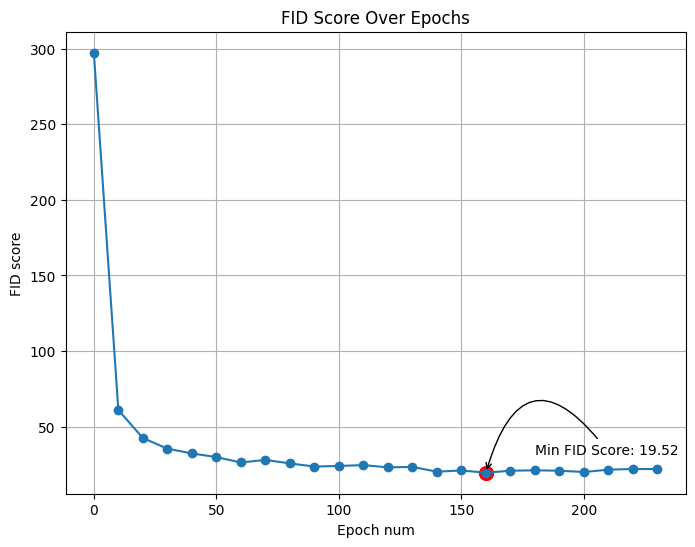

237/237 [==============================] - 180s 760ms/step - d_loss: -0.1362 - g_loss: 6.1907 - lr: 1.2969e-04
Epoch 232/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.1363 - g_loss: 5.9678 - lr: 1.2968e-04
Epoch 233/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.1230 - g_loss: 5.9577 - lr: 1.2968e-04
Epoch 234/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.1141 - g_loss: 5.8724 - lr: 1.2968e-04
Epoch 235/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.1140 - g_loss: 5.6123 - lr: 1.2968e-04
Epoch 236/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.1064 - g_loss: 5.6066 - lr: 1.2968e-04
Epoch 237/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.1044 - g_loss: 5.7367 - lr: 1.2968e-04
Epoch 238/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.1038 - g_loss: 5.6751 - lr: 1.2968e-04
Epoch 239/802


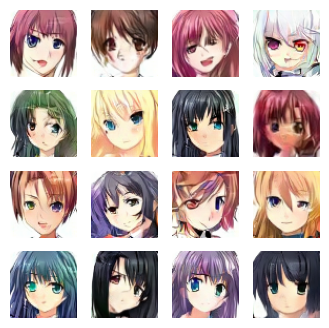

animeGenerated_wgan_240epochs


Output of the calculating FID command:
FID:  21.84242983013644

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884, 26.28640065762295, 27.9968025091369, 25.671734417948954, 23.595382791911504, 24.00506405680528, 24.5704907789667, 23.05014699591598, 23.365371124678546, 20.20282896700988, 21.013603356601607, 19.515331553423437, 20.85235096837826, 21.10220780713985, 20.84627962124273, 19.990243070196954, 21.54297259650147, 21.980716855153418, 21.945344551876275, 21.84242983013644]
[297.38421873  60.97684434  42.49609031  35.43261871  32.28203472
  29.85276802  26.28640066  27.99680251  25.67173442  23.59538279
  24.00506406  24.57049078  23.050147    23.36537112  20.20282897
  21.01360336  19.51533155  20.85235097  21.10220781  20.84627962
  19.99024307  21.5429726   21.98071686  21.94534455  21.84242983]


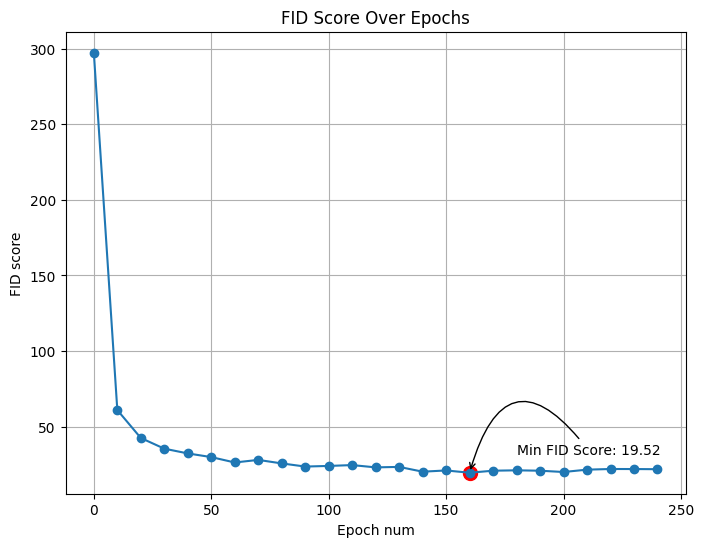

237/237 [==============================] - 182s 766ms/step - d_loss: -0.0883 - g_loss: 5.4157 - lr: 1.2967e-04
Epoch 242/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.0831 - g_loss: 5.3468 - lr: 1.2967e-04
Epoch 243/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.0773 - g_loss: 5.4757 - lr: 1.2967e-04
Epoch 244/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.0802 - g_loss: 5.3408 - lr: 1.2967e-04
Epoch 245/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.0620 - g_loss: 5.2293 - lr: 1.2967e-04
Epoch 246/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.0609 - g_loss: 5.3667 - lr: 1.2966e-04
Epoch 247/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.0615 - g_loss: 5.1697 - lr: 1.2966e-04
Epoch 248/802
237/237 [==============================] - 163s 689ms/step - d_loss: -0.0582 - g_loss: 5.0821 - lr: 1.2966e-04
Epoch 249/802


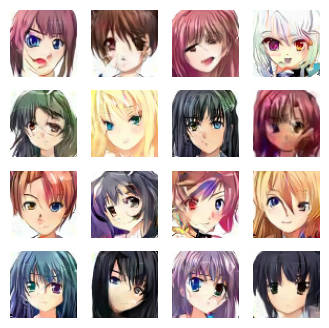

animeGenerated_wgan_250epochs


Output of the calculating FID command:
FID:  21.30278670970037

FID_scores:  [297.3842187304329, 60.97684434139208, 42.49609031358017, 35.432618714737714, 32.282034720672414, 29.852768024021884, 26.28640065762295, 27.9968025091369, 25.671734417948954, 23.595382791911504, 24.00506405680528, 24.5704907789667, 23.05014699591598, 23.365371124678546, 20.20282896700988, 21.013603356601607, 19.515331553423437, 20.85235096837826, 21.10220780713985, 20.84627962124273, 19.990243070196954, 21.54297259650147, 21.980716855153418, 21.945344551876275, 21.84242983013644, 21.30278670970037]
[297.38421873  60.97684434  42.49609031  35.43261871  32.28203472
  29.85276802  26.28640066  27.99680251  25.67173442  23.59538279
  24.00506406  24.57049078  23.050147    23.36537112  20.20282897
  21.01360336  19.51533155  20.85235097  21.10220781  20.84627962
  19.99024307  21.5429726   21.98071686  21.94534455  21.84242983
  21.30278671]


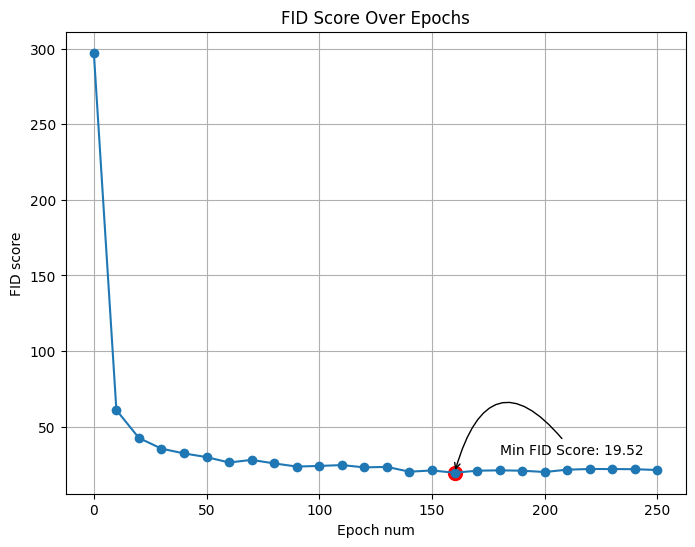

237/237 [==============================] - 180s 761ms/step - d_loss: -0.0488 - g_loss: 5.0110 - lr: 1.2966e-04
Epoch 252/802
 26/237 [==>...........................] - ETA: 2:25 - d_loss: -0.0246 - g_loss: 4.8195

In [ ]:
NUM_EPOCHS = 802 # number of epochs
wgan_gp.fit(train_images, epochs=NUM_EPOCHS, callbacks=[GANMonitor(num_img=16, latent_dim=LATENT_DIM), lr_scheduler]) # new: add lr_scheduler